# Decoding Methods For NLP
We don't simply select a token/word/character based on the probability of each token assigned by our model instead we typically build a model which outputs a set of probabilities to an array where each value in that array represents the probability of a specific word/token.<br>
When we are selecting a token in machine-generated text, we have a few alternative methods for performing this decode — and options for modifying the exact behavior too.
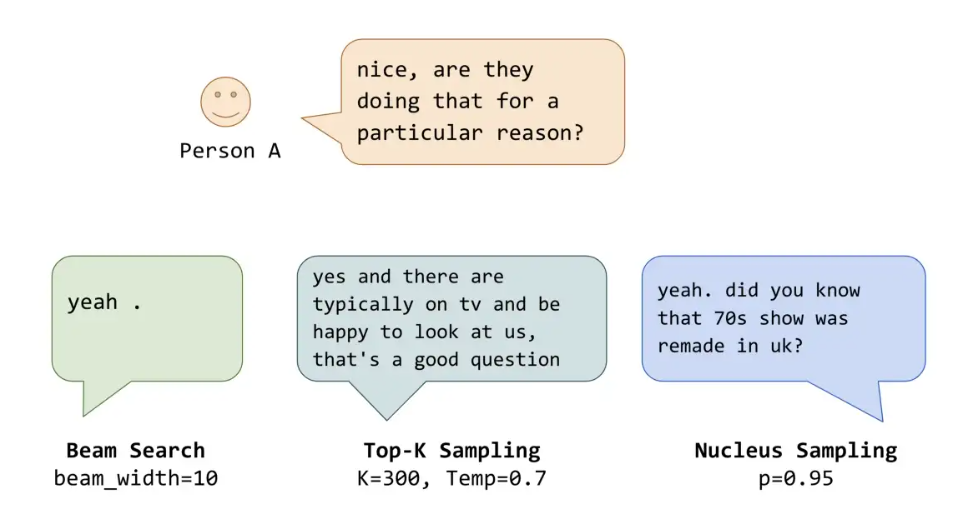

## Greedy Decoding
### Approach
The simplest option we have is greedy decoding. This takes our list of potential outputs and the probability distribution already calculated — and chooses the option with the **highest probability (argmax)**.
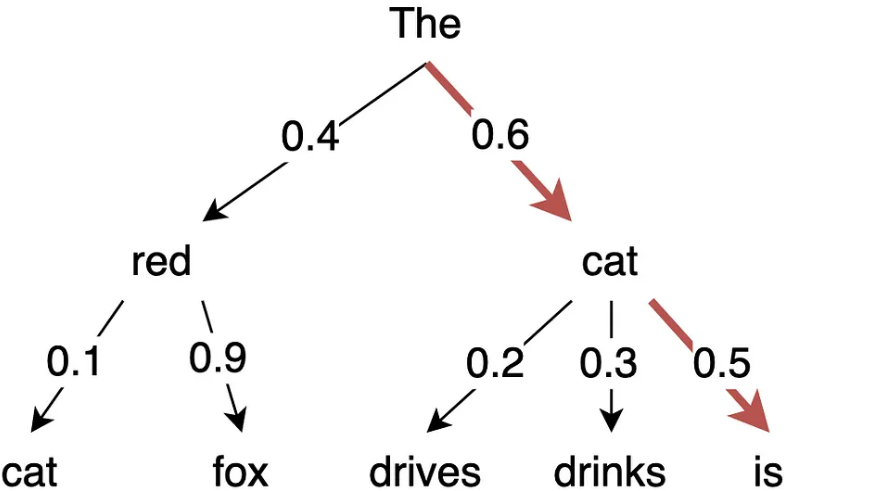
### Problem
It could generate the sequence of words, the quality of output is often low when compared to the other decoding algorithms in longer sequences.It get stuck on a particular word or sentence and repetitively assigning these sets of words the highest probability again and again.


## Random Sampling
### Approach
Random sampling chooses the next word based on these probabilities.This means randomly picking the next word according to the conditional word probability distribution extracted from the language model.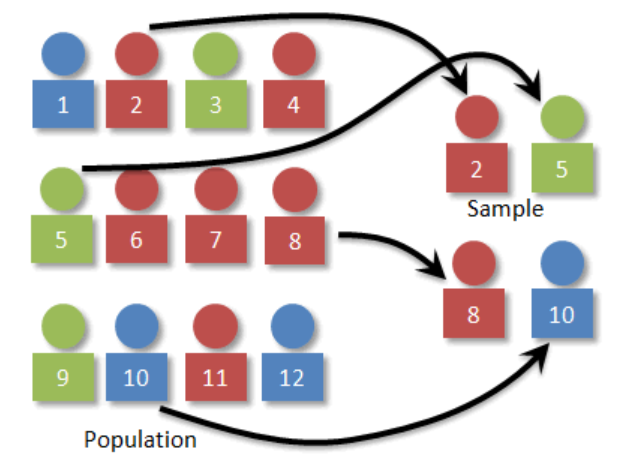
### Problem
This solves our problem of getting stuck in a repeating loop of the same words because we add randomness to our predictions. However, this introduces a different problem we will often find that this approach can be too random and lacks coherence.<br>


## Beam Search
### Approach
Beam search allows us to explore multiple levels of our output before selecting the best option.Beam search checks for multiple word/tokens into the future and assesses the quality of all of these tokens combined.<br>
**Beams** — the number of options we consider is the number of `beams` we search with.
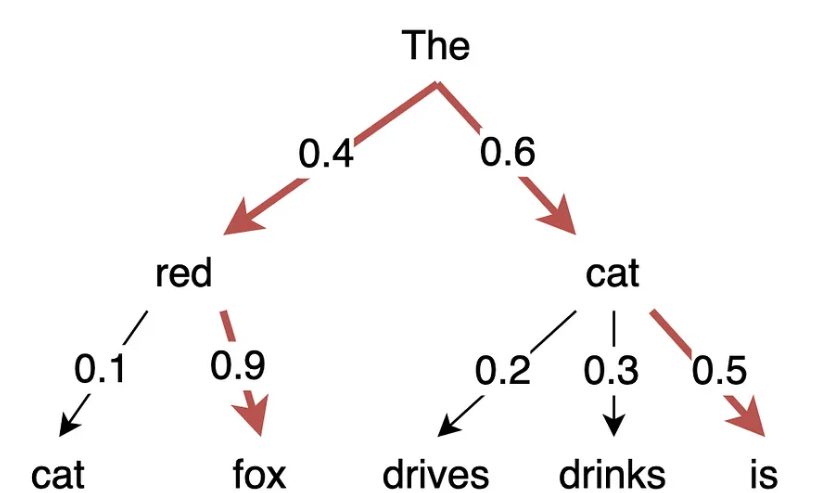
### Problem
Because we are now back to ranking sequences and selecting the most probable. Beam search can cause our text generation to again degrade into repetitive sequences.
<br>So, to solve this, we increase the decoding temperature — which controls the amount of randomness in the outputs by applying a softmax over the probability distribution and varying its temperature parameter to make it sharper or smoother.<br> 

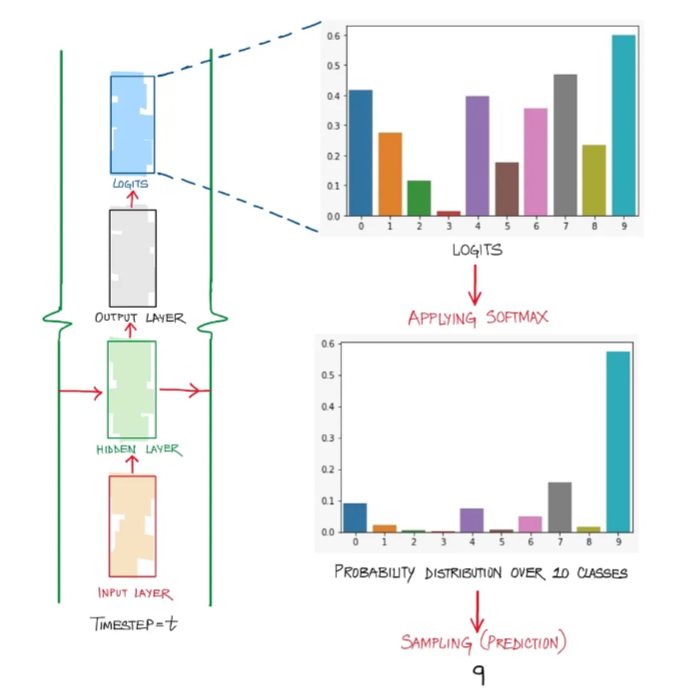
Random sampling with temperature. `Temperature` t is used to scale the value of each token before going into a softmax function.<br>
**Logits**:<br>
A Logit function, also known as the log-odds function, is a function that represents probability values from 0 to 1, and negative infinity to infinity. 

### Solution
**Increase the randomness** —  And that’s precisely what `Temperature` scaling does. It characterizes the entropy of the probability distribution used for sampling, in other words, it controls how surprising or predictable the next word will be. 
<br>The scaling is done by dividing the logit vector by a value T, which denotes the temperature, followed by the application of softmax.

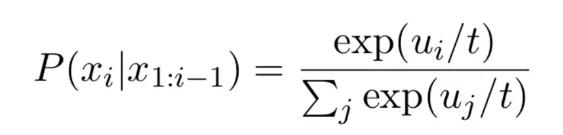
The default `temperature` is `1.0` — pushing this to a slightly higher value can makes a huge difference.<br>
The visualization of softmax with and without temperature is:

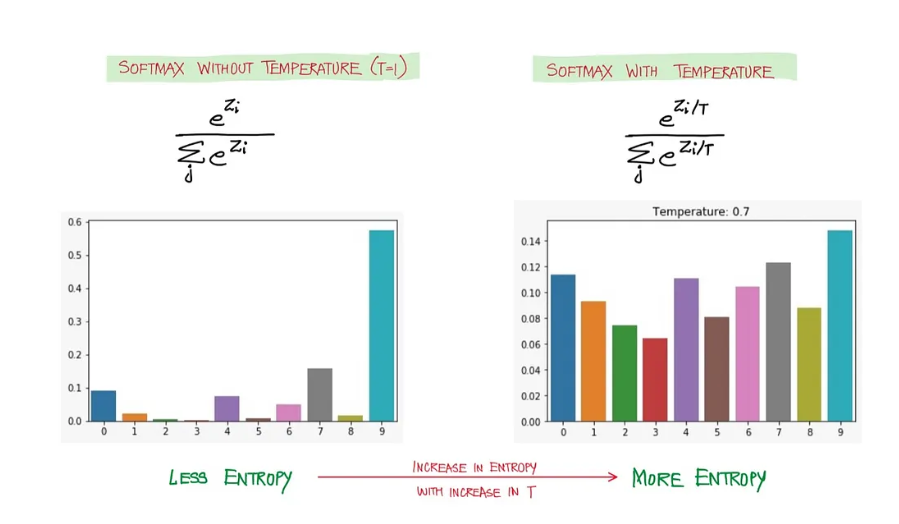

# Bidirectional LSTM
Unlike standard LSTM, the input flows in both directions, and it's capable of utilizing information from both sides. It's also a powerful tool for modeling the sequential dependencies between words and phrases in both directions of the sequence.
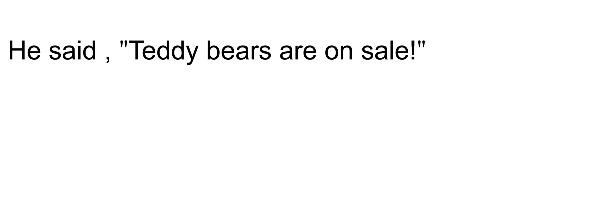
In bidirectional LSTM we give the input from both the directions from right to left and from left to right . Make a note this is not a **backward propagation** this is only the input which is given from both the side. So, the question is how the data is combined in output if we are having 2 inputs.

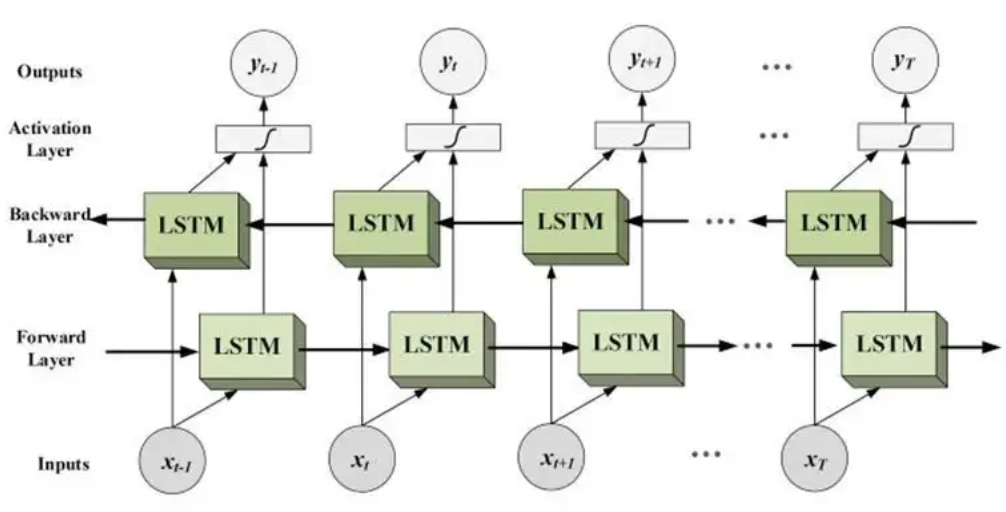
In other words, rather than encoding the sequence in the forward direction only, we encode it in the backward direction as well and concatenate the results from both forward and backward LSTM at each time step. The encoded representation of each word now understands the words before and after the specific word.
In bidirectional LSTM, instead of training a single model, we introduce two. The first model learns the sequence of the input provided, and the second model learns the reverse of that sequence.<br>

# BiLingual Evaluation Understudy
**BLEU** (BiLingual Evaluation Understudy) is a metric for automatically evaluating machine-translated text. The BLEU score is a number between zero and one that measures the similarity of the machine-translated text to a set of high quality reference translations.<br>
`A BLEU score of 1 means that the candidate sentence perfectly matches one of the reference sentences.`
### How is Bleu Score calculated?
The BLEU score compares a sentence against one or more reference sentences and tells how well does the candidate sentence matched the list of reference sentences. It gives an output score between 0 and 1.<br><br>
**Step-1**<br>
The first step is to compute Precision scores for 1-grams through 4-grams.
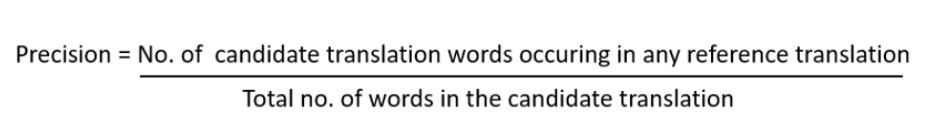
### Percision 1-gram:

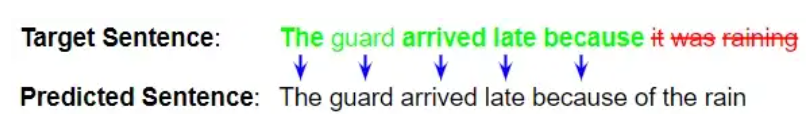

### Percision 2-gram:
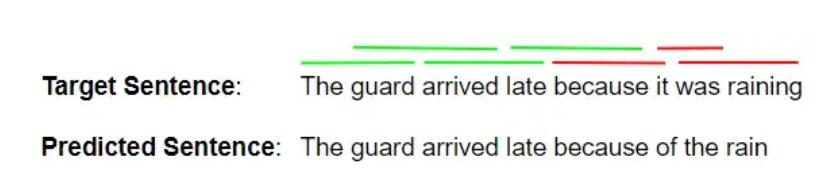
### Percision 3-gram:

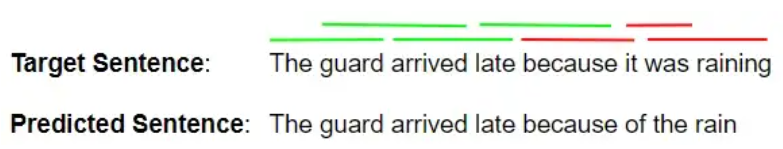
### Percision 4-gram:

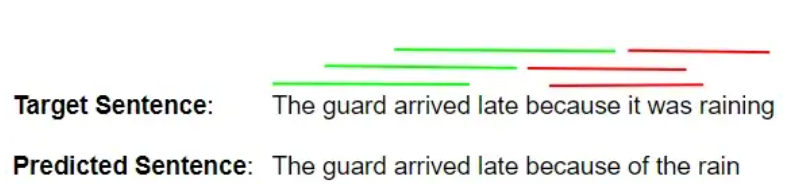
**Step-2**<br>
### Geometric Average Precision Scores:

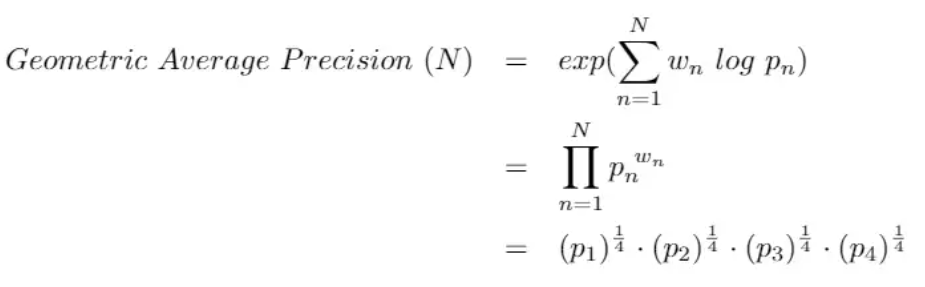
**Step-3**<br>
### Brevity Penalty:
The Brevity Penalty penalizes sentences that are too short.

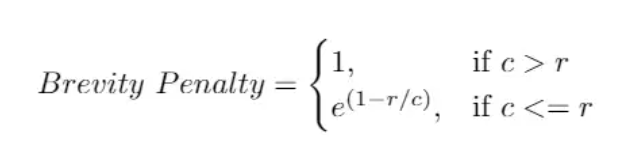
<li>c is predicted length = number of words in the predicted sentence and</li>
<li>r is target length = number of words in the target sentence</li>

**Example:**<br>
Suppose the reference length is 20 words and the machine-generated translation is 18 words long. The brevity penalty will be:<br>

`BP = min(1, exp(1 - 20 / 18)) = min(1, exp(1 - 1.11)) = min(1, 0.33) = 0.33`
<br>
This means that the BLEU score of the machine-generated translation will be multiplied by 0.33 as a penalty for its brevity compared to the reference.<br>

`This ensures that the Brevity Penalty cannot be larger than 1, even if the predicted sentence is much longer than the target. And, if you predict very few words, this value will be small.`

**Step-4**<br>
### BLEU:
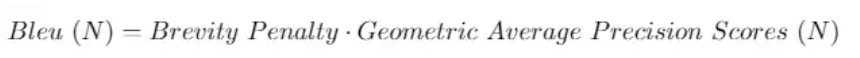

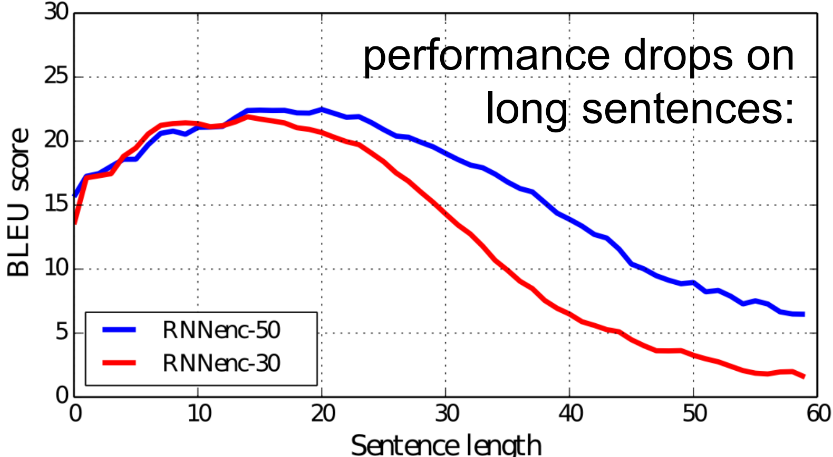
<br>The fixed size context-vector needs to contain a good summary of the meaning of the whole source sentence, being this one big bottleneck, specially for long sentences.<br>
The fixed length the context vector only summarizes the entire source sequence, and the decoder may not be able to attend to specific parts of the source sequence that are important for generating the target sequence.So, here comes in picture `Sequence to Sequence model with Attention`.

Resource: https://towardsdatascience.com/the-three-decoding-methods-for-nlp-23ca59cb1e9d<br>https://towardsdatascience.com/foundations-of-nlp-explained-bleu-score-and-wer-metrics-1a5ba06d812b